# 9/23 機械学習入門
## Cancer_logistic.py


In [1]:
# ロジスティック回帰
import sys
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

# データのロード
cancer = datasets.load_breast_cancer()

# 特徴量（30次元）
feature_names=cancer.feature_names
data = cancer.data

# 目的変数( malignant, benign )
name = cancer.target_names
label = cancer.target #分類問題では正解値として正解ラベルを学習時に与える,二値分類問題では，正例(1)もしくは負例(0)

# ホールドアウト法（学習データ，テストデータ）
train_data, test_data, train_label, test_label = train_test_split(data, label, test_size=0.5, random_state=None)

# ロジスティック回帰 
# (ソルバー：記憶制限付き準ニュートン法 L-BFGS)
# (ペナルティ項：2ノルム)
model = LogisticRegression(C=1.0,penalty='l2',solver='lbfgs',max_iter=100)

# 学習
model.fit(train_data, train_label)

# 予測
predict = model.predict(test_data)

# 係数と切片
print( '\n 係数ベクトル : ' , model.coef_ )
print( ' 切片 : ' , model.intercept_)

# 予測値，教師ラベル
print( '\n [ 予測値  :  教師ラベル ]' )
predict_proba = model.predict_proba(test_data)
for i in range(len(test_label)):
    print( predict_proba[i] , ':' , test_label[i] ) #predict_proba[i] = [p(0),p(1)][i]
    

# 予測結果の表示
print( "\n [ 予測結果 ]" )
print( ' accuracy  : ' , accuracy_score(test_label, predict) )
print( ' precision : ' , precision_score(test_label, predict) )
print( ' recall    : ' , recall_score(test_label, predict) )
print( ' f1-score  : ' , f1_score(test_label, predict) )

print( "\n [ 予測結果 ]" )
print( classification_report(test_label, predict) )

print( "\n [ 混同行列 ]" )
print( confusion_matrix(test_label, predict) )





 係数ベクトル :  [[ 0.82681946  0.35173963 -0.01914773  0.00649207 -0.02922726 -0.12739429
  -0.1884239  -0.0903814  -0.04906286 -0.00526464  0.04573603  0.20991506
   0.16554865 -0.11526574 -0.00561732 -0.02680734 -0.04446087 -0.01463333
  -0.00478777 -0.00240801  0.88923911 -0.39089774  0.04090957 -0.03223482
  -0.05775775 -0.32373208 -0.47230005 -0.15816935 -0.08923601 -0.0267871 ]]
 切片 :  [0.15434619]

 [ 予測値  :  教師ラベル ]
[0.00494191 0.99505809] : 1
[9.99369756e-01 6.30243735e-04] : 0
[0.02608425 0.97391575] : 1
[0.82289334 0.17710666] : 0
[9.99880641e-01 1.19358741e-04] : 0
[9.99999995e-01 5.38927092e-09] : 0
[1.00000000e+00 1.73449413e-15] : 0
[0.01095828 0.98904172] : 1
[0.0048003 0.9951997] : 1
[6.81098490e-04 9.99318902e-01] : 1
[0.04124127 0.95875873] : 1
[9.99978340e-01 2.16601601e-05] : 0
[9.99663496e-01 3.36503558e-04] : 0
[0.67729601 0.32270399] : 0
[0.17275854 0.82724146] : 1
[0.41888106 0.58111894] : 1
[0.00752642 0.99247358] : 1
[0.01854892 0.98145108] : 1
[0.04097022 0.9590

In [12]:
# データのロード
cancer = datasets.load_breast_cancer()

# 特徴量（30次元）
feature_names=cancer.feature_names
data = cancer.data

# 目的変数( malignant, benign )
name = cancer.target_names
label = cancer.target
#print(cancer.feature_names)
print(cancer.data)
len(cancer.data)
#print(name)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


569

## logistic_CV.py

In [11]:
# ロジスティック回帰（交叉検証）
import sys
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

# データのロード
cancer = datasets.load_breast_cancer()

# 特徴量（30次元）
feature_names=cancer.feature_names
data = cancer.data

# 目的変数( malignant, benign )
name = cancer.target_names
label = cancer.target

# ロジスティック回帰
model = LogisticRegression(C=1.0,penalty='l2',solver='lbfgs',max_iter=100)

# 交叉検証
score = { "accuracy": "accuracy",
            "precision": "precision_macro",
            "recall": "recall_macro",
            "f":"f1_macro"
            }

result = cross_validate(model, data, label, cv=5, scoring=score,)

# 結果の表示
for i , j in result.items():
    print( " {0:15s} : {1}".format( i , j ) )

 fit_time        : [0.07477999 0.0356791  0.03619599 0.03664112 0.04191089]
 score_time      : [0.00328898 0.00317788 0.00240493 0.00232387 0.00252509]
 test_accuracy   : [0.92982456 0.92982456 0.96491228 0.93859649 0.95575221]
 test_precision  : [0.94103194 0.92916806 0.96722973 0.93601737 0.95083056]
 test_recall     : [0.9115624  0.9207337  0.95734127 0.93154762 0.95506372]
 test_f          : [0.92297297 0.92460317 0.96191113 0.93369339 0.95285774]


## logistic_GS.py

In [14]:
# ロジスティック回帰
import sys
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV #グリッドサーチのためのライブラリ
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

# データのロード
cancer = datasets.load_breast_cancer()

# 特徴量（30次元）
feature_names=cancer.feature_names
data = cancer.data

# 目的変数( malignant, benign )
name = cancer.target_names
label = cancer.target

# ホールドアウト法（学習データ，テストデータ）
train_data, test_data, train_label, test_label = train_test_split(data, label, test_size=0.5, random_state=None)

# グリッドサーチ
parameters = {'C': [ 0.2, 1.0 ],
              'penalty' : [ 'l1' , 'l2' , 'none' ],
              'solver' : [ 'newton-cg', 'lbfgs' ],
              'max_iter' : [ 100 , 200 ]
              }

# ロジスティック回帰によるグリッドサーチ           
model = GridSearchCV(LogisticRegression(), parameters, cv=5)

# 学習
model.fit(train_data, train_label)

# 最良モデル( 変数 model は最良なモデルが求まっている ）
best_model = model.best_estimator_

print( "\n [ 最良なパラメータ ]" )
print( model.best_params_ )

# 予測
predict = best_model.predict(test_data)

# 係数と切片
print( '\n 係数ベクトル : ' , best_model.coef_ )
print( ' 切片 : ' , best_model.intercept_)

# 予測値，教師ラベル
print( '\n [ 予測値  :  教師ラベル ]' )
predict_proba = best_model.predict_proba(test_data)
for i in range(len(test_label)):
    print( predict_proba[i] , ':' , test_label[i] )
    
# 予測結果の表示
print( "\n [ 予測結果 ]" )
print( ' accuracy  : ' , accuracy_score(test_label, predict) )
print( ' precision : ' , precision_score(test_label, predict) )
print( ' recall    : ' , recall_score(test_label, predict) )
print( ' f1-score  : ' , f1_score(test_label, predict) )

print( "\n [ 予測結果 ]" )
print( classification_report(test_label, predict) )

print( "\n [ 混同行列 ]" )
print( confusion_matrix(test_label, predict) )

# 交叉検証の結果
#print( "\n [ 交叉検証の全結果 ]" )
#for i ,  j in model.cv_results_.items():
#    print( i , " : " , j )


 [ 最良なパラメータ ]
{'C': 0.2, 'max_iter': 100, 'penalty': 'none', 'solver': 'newton-cg'}

 係数ベクトル :  [[ 5.52904987e+00 -1.59149498e+00  8.03708547e-01 -7.67465823e-02
  -1.64261464e+01  3.66204844e+01 -2.22085957e+01 -3.43412539e+01
   8.60696490e+00  7.69871710e+00 -1.58642740e+01 -1.33425114e+00
  -9.54645170e-01 -9.34909375e-02 -1.42542310e+00  5.92780944e+01
   4.06252598e+01 -1.03357356e+01  1.70885973e+01  9.55782994e+00
  -4.11254997e+00  6.67883448e-01 -1.10208873e-01  5.96284645e-04
  -3.81623953e+01  1.56962300e+01 -1.94389982e+01 -9.17632353e+01
  -3.17481233e+01  7.29211198e+00]]
 切片 :  [23.10940642]

 [ 予測値  :  教師ラベル ]
[3.37175429e-04 9.99662825e-01] : 1
[1.00000000e+00 1.00582191e-70] : 0
[1.97221580e-04 9.99802778e-01] : 1
[3.29373981e-08 9.99999967e-01] : 1
[9.99999827e-01 1.72853863e-07] : 0
[1.73804829e-05 9.99982620e-01] : 1
[6.22962992e-09 9.99999994e-01] : 1
[1.00000000e+00 4.45889628e-15] : 0
[1.89004520e-04 9.99810995e-01] : 1
[1.42514297e-06 9.99998575e-01] : 1
[2.7

# 10/7 練習問題①  
学習データ(prac_1_train-1.csv)を用いてロジスィック回帰モデルを学習しなさい.  
学習後のモデルを用いて，テストデータ(prac_1_test-1.csv)を予測しなさい.  
評価指標(混同行列，accuracy，precision，recall，f値)も求めて下さい.  

In [1]:
#!/usr/local/bin python3.7
import sys
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
import numpy as np

#===============================================================================================================================================

# 学習データのロード
data_learn = np.loadtxt(
    fname="prac_1_train-1.csv",
    dtype="float",
    delimiter=",")

# 学習データの特徴量（4次元）
train_data = data_learn[:, 0:4]

# 学習データの目的変数( malignant, benign )
train_label = data_learn[:, 4:5]

#===============================================================================================================================================

# テストデータのロード
data_test = np.loadtxt(
    fname="prac_1_test-1.csv",
    dtype="float",
    delimiter=",")

# テストデータの特徴量（4次元）
test_data = data_test[:, 0:4]

# テストデータの目的変数( malignant, benign )
test_label = data_test[:, 4:5]

#===============================================================================================================================================

# ロジスティック回帰
model = LogisticRegression(C=1.0,penalty='l2',solver='lbfgs',max_iter=100)

# 学習
model.fit(train_data, train_label)

# 予測
predict = model.predict(test_data)

# 係数と切片
print( '\n 係数ベクトル : ' , model.coef_ )
print( ' 切片 : ' , model.intercept_)

# 予測値，教師ラベル
print( '\n [ 予測値  :  教師ラベル ]' )
predict_proba = model.predict_proba(test_data)
for i in range(len(test_label)):
    print( predict_proba[i] , ':' , test_label[i] )
    

# 予測結果の表示
"""
print( "\n [ 予測結果 ]" )
print( ' accuracy  : ' , accuracy_score(test_label, predict) )
print( ' precision : ' , precision_score(test_label, predict) )
print( ' recall    : ' , recall_score(test_label, predict) )
print( ' f1-score  : ' , f1_score(test_label, predict) )
"""

print( "\n [ 予測結果 ]" )
print( classification_report(test_label, predict) )

print( "\n [ 混同行列 ]" )
print( confusion_matrix(test_label, predict) )


 係数ベクトル :  [[ 0.03084895 -0.02171109  0.09571813  0.02903143]
 [ 0.00782213  0.10035777 -0.09281304 -0.09434485]
 [-0.03867109 -0.07864668 -0.00290509  0.06531342]]
 切片 :  [-1.86438231  0.97975037  0.88463193]

 [ 予測値  :  教師ラベル ]
[0.66777912 0.05165947 0.28056141] : [0.]
[0.84255282 0.06272307 0.09472411] : [0.]
[0.58105936 0.05658006 0.36236058] : [0.]
[0.59841729 0.00491221 0.39667049] : [0.]
[0.3774422  0.00968279 0.61287501] : [0.]
[0.51688909 0.04057868 0.44253223] : [0.]
[0.40813022 0.18953636 0.40233342] : [0.]
[0.31750839 0.02720998 0.65528163] : [0.]
[0.22925054 0.01894197 0.7518075 ] : [0.]
[0.15923999 0.80804622 0.03271379] : [0.]
[0.72172993 0.05898756 0.2192825 ] : [0.]
[0.88686601 0.03005754 0.08307645] : [0.]
[0.79289679 0.10820471 0.09889849] : [0.]
[9.82148562e-01 3.65333614e-04 1.74861044e-02] : [0.]
[9.68758703e-01 5.70244682e-04 3.06710520e-02] : [0.]
[8.81119820e-01 7.88147864e-04 1.18092032e-01] : [0.]
[0.8406058  0.03890281 0.12049139] : [0.]
[0.8725974  0.01494

# 10/21 最近傍法
k近傍法のプログラム
数字認識(digitsデータベース)

In [20]:
# k近傍法（digitsデータベース）
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# k近傍法
K = 5

# データのロード
# 'data' , 'target' , 'frame' , 'future_names' , 'target_names' , 'images' , 'DESCR' からなる1797個のデータ
digits = datasets.load_digits()

# 特徴量 (1797, 8, 8) 
# 縦横8*8の画像データを長さ64の特徴量ベクトルに変換(np.reshape)
image = digits.images
total , x_size , y_size = image.shape 
image = np.reshape( image , [total,x_size*y_size] )

# 目的変数
label = digits.target

# 学習データ，テストデータ(ホールドアウト法)
train_data, test_data, train_label, test_label = train_test_split(image, label, test_size=0.5, random_state=None)

# 引数の中身：(調べる近傍の個数，アルゴリズム，計量，ミンコフスキー距離のp)
# algorithm：デフォルトでは'brute' → 全探索(デフォルト)
# metric：デフォルトではp=2のユークリッド距離
model = KNeighborsClassifier(n_neighbors=K, algorithm='kd_tree', metric='minkowski', p=2)
# k = 4で簡単に使いたい場合下の行のようになる
# model = KNeighborsClassifier(n_neighbors=4)

# 学習
model.fit(train_data, train_label)

# 予測
predict = model.predict(test_data)
distance , result = model.kneighbors(test_data,n_neighbors=K)

# K個の候補，距離，予測結果，正解の表示
#for i in range(len(test_data)): # 全て表示していない
print("出力形式は")
print("第1候補(ラベル) ，第2候補(ラベル)，..., 第k候補(ラベル)  [それぞれの候補との距離]")
print("-> 予測値 (正解データ)")
print("のようになっています．")
for i in range(50):
    for j in range( K ):
        print( "{0:4d}({1})".format(result[i,j],train_label[ result[i,j] ]) , end=" ")
    print( " [ " , end="" )
    for j in range( K ):
        print( "{0:5.2f}".format( distance[i,j] ) , end=" ")
    print( " ] -> {0} [ {1} ]".format( predict[i] , test_label[i] ) )

print( "\n [ 予測結果 ]" )
print( classification_report(test_label, predict) )

print( "\n [ 正解率 ]" )
print( accuracy_score(test_label, predict) )

print( "\n [ 混同行列 ]" )
print( confusion_matrix(test_label, predict) )


出力形式は
第1候補(ラベル) ，第2候補(ラベル)，..., 第k候補(ラベル)  [それぞれの候補との距離]
-> 予測値 (正解データ)
のようになっています．
 660(0)  805(0)  164(0)  268(0)  709(0)  [ 16.40 17.00 20.40 20.42 20.93  ] -> 0 [ 0 ]
 727(0)  208(0)  231(0)  103(0)  596(0)  [ 16.73 18.14 19.05 22.18 22.29  ] -> 0 [ 0 ]
 265(4)  250(4)  329(4)   50(4)  653(4)  [ 14.59 19.60 19.67 20.78 21.40  ] -> 4 [ 4 ]
 488(6)  827(6)  605(6)  518(6)  307(6)  [ 14.32 14.80 16.67 16.82 17.06  ] -> 6 [ 6 ]
 101(5)  869(5)  804(5)  587(5)  135(5)  [ 26.44 27.42 30.23 31.94 33.18  ] -> 5 [ 5 ]
 698(6)   20(6)  160(6)  509(6)  789(6)  [ 14.35 15.26 16.00 16.28 16.40  ] -> 6 [ 6 ]
 239(9)  380(9)  362(9)  471(1)  694(1)  [ 22.49 29.22 30.22 30.72 31.98  ] -> 9 [ 9 ]
 869(5)  135(5)  804(5)  101(5)  127(5)  [ 14.97 20.22 20.40 22.07 22.83  ] -> 5 [ 5 ]
 754(7)  238(7)  813(7)  442(7)  726(7)  [ 21.70 23.73 27.71 29.82 30.03  ] -> 7 [ 7 ]
 819(4)  378(4)  888(4)  457(4)   78(4)  [ 17.49 17.80 18.03 19.42 20.20  ] -> 4 [ 4 ]
  17(5)  192(5)  799(5)  366(5)  272(5)  [ 16.

# 10/28 決定木
Irisデータセット(クラス分類)  
Bostonデータセット(回帰木)  
  
## Iris_Tree.py(アヤメの分類)

You should consider upgrading via the '/Users/duffyyy1130/.pyenv/versions/3.8.0/bin/python3.8 -m pip install --upgrade pip' command.
[正解値]
[2 0 2 0 0 0 2 0 2 2 1 2 0 0 2 2 1 1 0 2 1 0 1 0 0 2 2 2 0 2 0 1 2 2 2 2 1
 0 1 2 1 0 0 1 1 1 0 0 1 2 1 1 0 2 0 2 0 1 1 1 0 0 2 2 1 0 0 0 1 2 0 1 2 0
 0]
[予測値]
[2 0 1 0 0 0 2 0 1 2 1 2 0 0 2 1 1 1 0 2 1 0 1 0 0 2 2 2 0 2 0 1 2 2 2 1 1
 0 1 2 1 0 0 1 1 1 0 0 1 2 1 1 0 2 0 2 0 2 1 1 0 0 2 2 1 0 0 0 1 2 0 1 2 0
 0]
 [ 予測結果 ]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.83      0.95      0.89        21
           2       0.95      0.84      0.89        25

    accuracy                           0.93        75
   macro avg       0.93      0.93      0.93        75
weighted avg       0.94      0.93      0.93        75


 [ 正解率 ]
0.9333333333333333

 [ 混同行列 ]
[[29  0  0]
 [ 0 20  1]
 [ 0  4 21]]


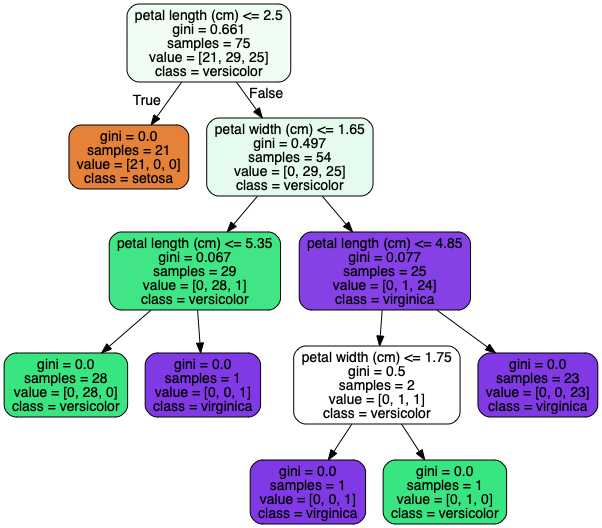

In [48]:
!pip install Graphviz #決定木の表示に必要
# Decision Tree（Irisデータセット）
import numpy
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# データのロード
iris = datasets.load_iris()

# 種類( setosa , versicolor , virginica )
name = iris.target_names 

# sepal length ガクの長さ
# sepal width  ガクの幅
# petal length 花弁の長さ
# petal width  花弁の幅
data = iris.data

# setosa:0 , versicolor:1 , virginica:2
label = iris.target

# 学習データ，テストデータ
train_data, test_data, train_label, test_label = train_test_split(data, label, test_size=0.5, random_state=None)
print("[正解値]")
print( test_label )

# クラス分類用の決定木(tree.DecisionTreeClassifier)
# 分類の指標はcriterionで指定 "gini":ジニ係数 ，"entropy":エントロピー
# max_depth:決定木の深さ
model = tree.DecisionTreeClassifier(criterion="gini",max_depth=10)

# 学習
model.fit(train_data, train_label)

# 予測
predict = model.predict(test_data)
print("[予測値]")
print( predict )

print( " [ 予測結果 ]" )
print( classification_report( test_label, predict) )

print( "\n [ 正解率 ]" )
print( accuracy_score(test_label, predict) )

print( "\n [ 混同行列 ]" )
print( confusion_matrix(test_label, predict) )


# 決定木の視覚化
tree.export_graphviz(model, out_file="iris_tree.dot",feature_names=iris.feature_names,class_names=name,filled=True, rounded=True)

# iris_tree.dot を iris_tree.pngに変換(シェルスクリプト)
! dot -T png iris_tree.dot -o iris_tree.png
# iris_tree.pngを表示
from IPython.display import Image
pwd = ! pwd             #現在のディレクトリを取得
path = str(pwd)
path = path[2:len(path)-2] + "/iris_tree.png"    # iris_tree.pngがあるpathを作成
Image(path)

In [42]:
pwd = ! pwd 
path = str(pwd)
print(str(path)[2:len(path)-2] + "/k")

/Volumes/GoogleDrive/マイドライブ/Univ/Machine_learning/Lecture_of_ML_2019/k


## Boston_Tree.py(ボストンの住宅価格の回帰問題)


 [ R2 ]
 学習データ  : 0.84005
 テストデータ: 0.57539


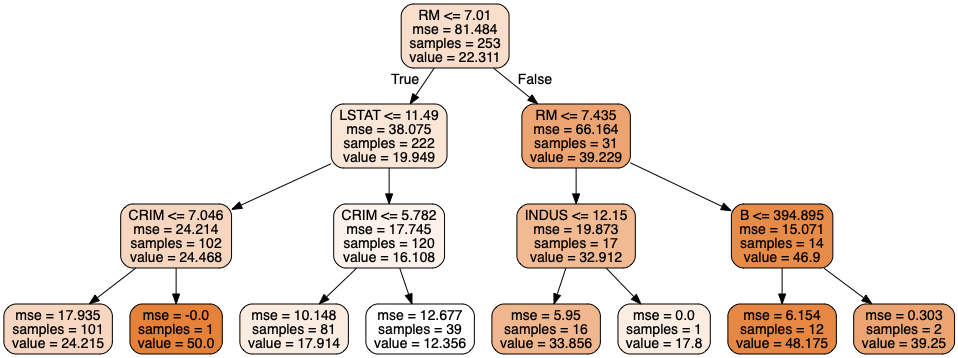

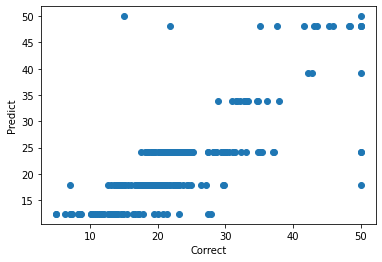

In [51]:
# 回帰木（Bostonデータセット）
import numpy
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# データのロード
boston = datasets.load_boston()

# 特徴量
feature_names = boston.feature_names

# データ
data = boston.data

# 価格
price = boston.target

# 学習データ，テストデータ
train_data, test_data, train_price, test_price = train_test_split(data, price, test_size=0.5, random_state=None)

# 回帰木
# 指標(criterion)は平均二乗誤差"mse"
model = tree.DecisionTreeRegressor(criterion="mse", max_depth=3)

# 学習
model.fit(train_data, train_price)

# 予測（テストデータ）
predict = model.predict(test_data) 

# R2( 相関係数の二乗 )を求める
train_score = model.score(train_data, train_price)
test_score = model.score(test_data, test_price)

print( "\n [ R2 ]" )
print( " 学習データ  : {0:7.5f}".format( train_score ) )
print( " テストデータ: {0:7.5f}".format( test_score ) )

# 散布図の描画
fig = plt.figure()
plt.scatter( test_price , predict )
plt.xlabel("Correct")
plt.ylabel("Predict")
fig.savefig("result.png")


# 決定木の視覚化
tree.export_graphviz(model, out_file="boston_tree.dot",feature_names=boston.feature_names,filled=True, rounded=True)

# boston_tree.dot を boston_tree.pngに変換(シェルスクリプト)
! dot -T png boston_tree.dot -o boston_tree.png
# boston_tree.pngを表示
from IPython.display import Image
pwd = ! pwd             #現在のディレクトリを取得
path = str(pwd)
path = path[2:len(path)-2] + "/boston_tree.png"    # boston_tree.pngがあるpathを作成
Image(path)